In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as si
import scipy as sp

# Integral Transform
$$
g(\mathbf{x}) = \int\limits_{\Omega} K(\mathbf{x}, \xi) f(\xi) d\xi, \quad \mathbf{x}, \xi \in\Omega\subset\mathbb{R}^n \nonumber
$$

* $K(\mathbf{x}, \xi)$ - the Kernel;
* Mapping a function $f(\mathbf{x})$ in $\mathbf{x}$-space into another function $g(\xi)$ in $\xi$-space
* Fourier, Wavelet, Z-transform, Laplace, Hilbert, Radon, etc



## Fourier transform
### Discrete Fourier transform (DFT)
Given a sequence $\{x_0,...,x_{N-1}\}$ of $N$ complex numbers,
- The DFT transforms $\{x_0,...,x_{N-1}\}$ into $\{X_0,...,X_{N-1}\}$ i.e. $\mathcal{F}\{x \}=X$ such that :
$$X_k=\sum_{n=0}^{N-1}x_n\exp(-i2π\frac{k}{N}n) \; ∀k=0,...,N-1$$
- The inverse fourier transform,$x=\mathcal{F}^{-1}\{X\}$ , is given by :  
$$x_n=\frac{1}{N}\sum_{k=0}^{N-1}X_k\exp(i2π\frac{k}{N}n)$$
- We can represent it in form of a matrix, for $w$ : $N$th root of unity, i.e. $\displaystyle w=\exp(-i2π/N)$ :
$$\left(\begin{matrix} X_0\\X_1 \\ \vdots \\X_{N-2} \\X_{N-1} \end{matrix}\right)=\left(\begin{matrix} 1 & 1 & \cdots & 1 &1\\1 & w & \cdots & w^{N-2} &w^{N-1} \\ \vdots & \vdots & \vdots & \vdots &\vdots \\1 & w^{N-2} & \cdots & w^{(N-2)(N-2)} &w^{(N-2)(N-1)} \\1 & w^{N-1} & \cdots & w^{(N-1)(N-2)} &w^{(N-1)(N-1)}  \end{matrix}\right)
\left(\begin{matrix} x_0\\x_1 \\ \vdots \\x_{N-2} \\x_{N-1} \end{matrix}\right)$$

$$⇔ \left(\begin{matrix} x_0\\x_1 \\ \vdots \\x_{N-2} \\x_{N-1} \end{matrix}\right)=\frac{1}{N}
\left(\begin{matrix} 1 & 1 & \cdots & 1 &1\\1 & w^{-1} & \cdots & w^{-(N-2)} &w^{-(N-1)} \\ \vdots & \vdots & \vdots & \vdots &\vdots \\1 & w^{-(N-2)} & \cdots & w^{-(N-2)(N-2)} &w^{-(N-2)(N-1)} \\1 & w^{-(N-1)} & \cdots & w^{-(N-1)(N-2)} &w^{-(N-1)(N-1)}  \end{matrix}\right) \left(\begin{matrix} X_0\\X_1 \\ \vdots \\X_{N-2} \\X_{N-1} \end{matrix}\right)
$$


- The DFT of a multidimensional array $\displaystyle x_{n_1,...,n_d}$, where $n_l=0,...,N_l-1 \; ∀l=1,...,d$ is given by :
$$X_{k_1,...,k_d}=\sum_{n_1=0}^{N_1-1}\left(w_{N_1}^{k_1n_1}\sum_{n_2=0}^{N_2-1}\left(w_{N_2}^{k_2n_2} \cdots \sum_{N_d=0}^{N_d-1}w_{N_d}^{k_dn_d}x_{n_1,...,n_d}\right) \right)$$
Where $w_{N_l}=\exp(-i2π/N_l)$. We can rewrite the above in term of vector $k=(k_1,...,k_d),n=(n_1,..,n_d),N=(N_1,...,N_d)$:
$$X_k=\sum_{n=0}^{N-1}x_n\exp(-i2πk\cdot \frac{n}{N})$$
Its inverse transform is given by :
$$x_n=\frac{1}{\prod_{l=1}^dN_l}\sum_{k=0}^{N-1}X_k\exp(i2πk\cdot \frac{n}{N})$$
- Fast algorithm on computing the DFT (Fast Fourier Transform) : Cooley-Tukey algorithm.  

$$X_k=\sum_{n=0}^{N-1}x_n\exp(-i2π\frac{k}{N}n) \; ∀k=0,...,N-1$$
$$=\sum_{n=0}^{N/2-1}x_{2n}\exp(-i2π\frac{k}{N/2}(n))+\exp(-2iπ\frac{k}{N})\sum_{n=0}^{N/2-1}x_{2n+1}\exp(-i2π\frac{k}{N/2}(n))$$
1. **Base Case**: If the length of the input array $ x $ is 1 or less, return the array itself.
2. **Recursive Split**: Split the input array into even-indexed and odd-indexed elements.
3. **Recursive FFT**: Recursively compute the FFT of the even and odd elements.
4. **Combine Results**: Combine the results using the twiddle factors $ T $, which are the complex exponentials.
5. **Return**: Return the combined results.
For $N=2^R$ the reduction can be applied multiple times until we subdivide the data into the R transforms of length 1.

- For the 2D version of DFT :
$$X_{k_1,k_2}=\sum_{n_1=0}^{N_1-1}\left(w_{N_1}^{k_1n_1}\sum_{n_2=0}^{N_2-1}\left(w_{N_2}^{k_2n_2}x_{n_1,n_2} \right) \right)$$
$$=\sum_{n_1=0}^{N_1/2-1}\sum_{n_2=0}^{N_2/2-1}\exp\left(-2iπ\left(\frac{n_1k_1}{N_1/2}+\frac{n_2k_2}{N_2/2} \right)\right)x_{2n_1,2n_2}
+\exp(-2iπ\frac{k_1}{N_1})\sum_{n_1=0}^{N_1/2-1}\sum_{n_2=0}^{N_2/2-1}\exp\left(-2iπ\left(\frac{n_1k_1}{N_1/2}+\frac{n_2k_2}{N_2/2} \right)\right)x_{2n_1+1,2n_2}
+\exp(-2iπ\frac{k_2}{N_2})\sum_{n_1=0}^{N_1/2-1}\sum_{n_2=0}^{N_2/2-1}\exp\left(-2iπ\left(\frac{n_1k_1}{N_1/2}+\frac{n_2k_2}{N_2/2} \right)\right)x_{2n_1,2n_2+1}
+\exp(-2iπ(k_1/N_1+k_2/N_2))\sum_{n_1=0}^{N_1/2-1}\sum_{n_2=0}^{N_2/2-1}\exp\left(-2iπ\left(\frac{n_1k_1}{N_1/2}+\frac{n_2k_2}{N_2/2} \right)\right)x_{2n_1+1,2n_2+1}$$


In [41]:
#this perform a fourier transform of an 1D array :
def DFT_matrix(n):
  x,y=np.mgrid[0:n:1,0:n:1]
  return np.exp(-2*np.pi*1j*x*y/n)

#cooley-Tukey FFT algorithm

def DFT_1D(array):#DFT of (x_0, x_1, x_{2}, ..., x_{N-1})
  N=len(array)
  if N<=1:
    return array

  elif N&(N-1) == 0: #check if it is power of 2
    X=np.zeros_like(array,dtype=complex)
    even=DFT_1D(array[0::2])
    odd=DFT_1D(array[1::2])
    for k in range(N//2):
      p=even[k]
      q=np.exp(-2j*np.pi*k/N)*odd[k]
      X[k]=complex(p+q)
      X[k+N//2]=complex(p-q)
    return X
  else:
    return DFT_matrix(N)@array

def DFT_2D(f):
    M, N = f.shape
    if M <= 1 and N <= 1:
        return f
    elif (N&(N-1) == 0) and (M&(M-1)==0): #check if it is power of 2
      # Split the input into four parts
      f_ee = f[::2, ::2]  # Even-Even
      f_eo = f[::2, 1::2]  # Even-Odd
      f_oe = f[1::2, ::2]  # Odd-Even
      f_oo = f[1::2, 1::2]  # Odd-Odd

      # Recursively compute the FFT of each part
      F_ee = DFT_2D(f_ee)
      F_eo = DFT_2D(f_eo)
      F_oe = DFT_2D(f_oe)
      F_oo = DFT_2D(f_oo)

      # Combine the results
      M2, N2 = M // 2, N // 2
      F = np.zeros((M, N), dtype=complex)

      for k in range(M2):
          for l in range(N2):
              T_eo = F_eo[k, l] * np.exp(-2j * np.pi * l / N)
              T_oe = F_oe[k, l] * np.exp(-2j * np.pi * k / M)
              T_oo = F_oo[k, l] * np.exp(-2j * np.pi * (k / M + l / N))

              F[k, l] = F_ee[k, l] + T_eo + T_oe + T_oo
              F[k, l + N2] = F_ee[k, l] - T_eo + T_oe - T_oo
              F[k + M2, l] = F_ee[k, l] + T_eo - T_oe - T_oo
              F[k + M2, l + N2] = F_ee[k, l] - T_eo - T_oe + T_oo

      return F
    else:
      F = np.zeros((M, N), dtype=complex)
      for u in range(M):
          for v in range(N):
              a=np.array([[f[m, n]*np.exp(-2j*np.pi*(u*m/M+v*n/N)) for m in range(M)] for n in range(N)])


              F[u, v] = np.sum(a)
      return F



### Fourier transform for continuous data
- A fourier transform a complex-valued function  $f(x)$ into its constituent frequencies and their amplitudes. The inverse process is synthesis, which recreates $f(x)$ from its transform.
$$\mathcal{F}[f](ω)=\widehat{f}(w)=\int_{\mathbb{R}}f(x)\exp(-iwx)dx$$
$$⇔\mathcal{F^{-1}}[\widehat{f}](x)=f(x)=\frac{1}{2\pi}\int_{\mathbb{R}}f(x)\exp(iw x)dw$$
- Example:
1. $f(x)=1$
$$\widehat{f}(w)=\int_{\mathbb{R}}\exp(-iwx)dx=δ(w)$$
$$⇔\mathcal{F^{-1}}[\widehat{f}](x)=\frac{1}{2\pi}\int_{\mathbb{R}}δ(x)\exp(iw x)=1$$
2. $f(x)=\exp(iax)$
$$\widehat{f}(w)=\int_{\mathbb{R}}\exp(iax)\exp(-iwx)dx=δ(w-a)$$
$$\mathcal{F^{-1}}[\widehat{f}](x)=\frac{1}{2\pi}\int_{\mathbb{R}}δ(w-a)\exp(iw x)dw=\exp(iax)$$
3. $f(x)=\cos(ax)$
$$\widehat{f}(w)=\int_{\mathbb{R}}\cos(ax)\exp(-iwx)dx=\frac{1}{2}\left(δ(w-a)+δ(w+a)\right)$$
$$\mathcal{F^{-1}}[\widehat{f}](x)=\frac{1}{2\pi}\int_{\mathbb{R}}\frac{1}{2}\left(δ(w-a)+δ(w+a)\right)\exp(iw x)=cos(ax)$$

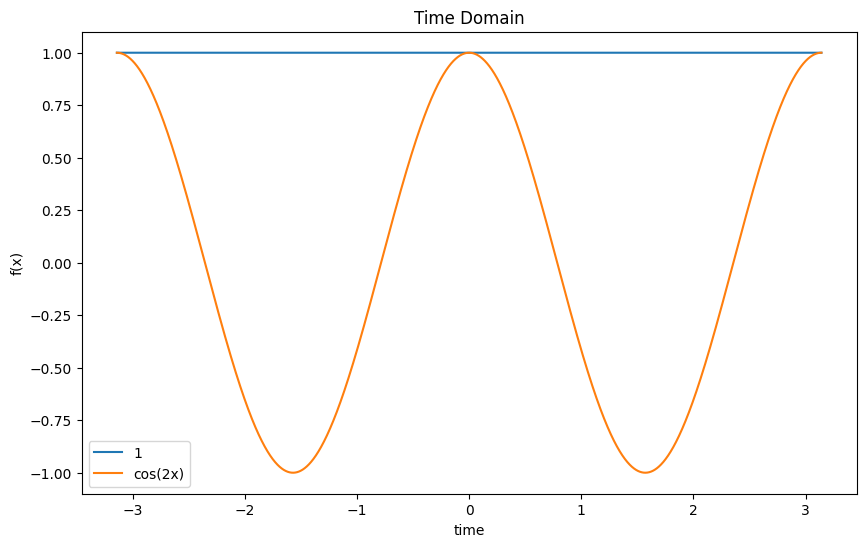

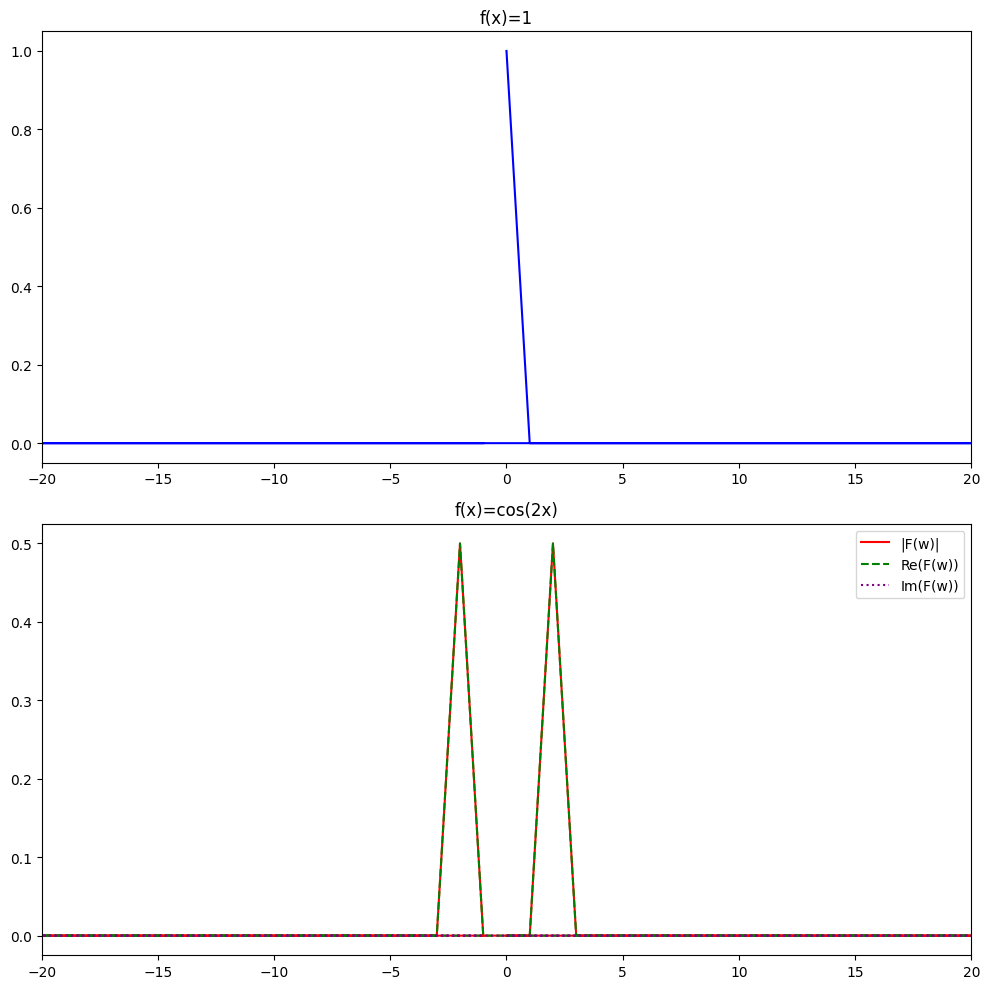

In [35]:

N = 10**5
x = np.linspace(-np.pi, np.pi, N)
a = 2

f1 = np.ones_like(x)
f2 = np.cos(a * x)

plt.figure(figsize=(10, 6))
plt.plot(x, f1, label="1")
plt.plot(x, f2, label=f"cos({a}x)")
plt.xlabel("time")
plt.ylabel("f(x)")
plt.title("Time Domain")
plt.legend()
plt.show()

# Its Fourier transform
dx = x[1] - x[0]
freq = np.fft.fftfreq(N, dx) * 2 * np.pi

F1_w = np.fft.fft(f1)
F2_w = np.fft.fft(f2)

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Normalize the FFT results
F1_w /= N
F2_w /= N

# Calculate magnitude, real, and imaginary parts of F2_w
F2_w1 = np.abs(F2_w)
F2_w2 = np.real(F2_w)
F2_w3 = np.imag(F2_w)

ax0.set_xlim(-10 * a, 10 * a)
ax1.set_xlim(-10 * a, 10 * a)

ax0.set_title('f(x)=1')
ax1.set_title(f'f(x)=cos({a}x)')

# Plot the magnitude of F1_w
ax0.plot(freq, np.abs(F1_w), label='|F(w)|', color='blue')

# Plot the magnitude, real, and imaginary parts of F2_w
ax1.plot(freq, F2_w1, label=f'|F(w)|', color='red')
ax1.plot(freq, F2_w2, label=f'Re(F(w))', linestyle='--', color='green')
ax1.plot(freq, F2_w3, label=f'Im(F(w))', linestyle=':', color='purple')

plt.legend()
plt.tight_layout()
plt.show()


### Convolution
Let $k,f:\mathbb{R}^n\rightarrow \mathbb{R}^n$ be functions. A function $g$ is called convolution of $k$ and f if $$g=k*f ⇔g(x)=\int_{\mathbb{R}^n}k(x-t)f(t)dt $$
$k$ is called kernel or point spread function and being defined by hardware.

It known that fourier transform of convolution is product of fourier transform. i.e.
$$\mathcal{F}[f*g]=\mathcal{F}[f]\mathcal{F}[g] ⇔ \mathcal{F^{-1}}[\hat{f}\hat{g}]=f*g$$

In [6]:
#print(np.mgrid[0:10:1,0:10:1])
[x,y]=np.mgrid[0:10:1,0:9:1]
print(x,y)
print(x[x**2+y**2<100])

[[0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4 4 4]
 [5 5 5 5 5 5 5 5 5]
 [6 6 6 6 6 6 6 6 6]
 [7 7 7 7 7 7 7 7 7]
 [8 8 8 8 8 8 8 8 8]
 [9 9 9 9 9 9 9 9 9]] [[0 1 2 3 4 5 6 7 8]
 [0 1 2 3 4 5 6 7 8]
 [0 1 2 3 4 5 6 7 8]
 [0 1 2 3 4 5 6 7 8]
 [0 1 2 3 4 5 6 7 8]
 [0 1 2 3 4 5 6 7 8]
 [0 1 2 3 4 5 6 7 8]
 [0 1 2 3 4 5 6 7 8]
 [0 1 2 3 4 5 6 7 8]
 [0 1 2 3 4 5 6 7 8]]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 4
 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 8 8 8 8
 8 8 9 9 9 9 9]


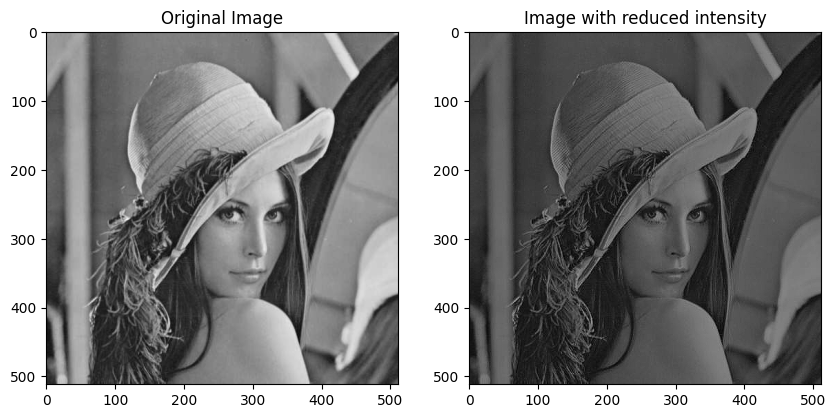

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from urllib.request import urlretrieve

# Function to perform convolution using FFT
def reduce_intensity_kernel(image):
    Nx,Ny=image.shape
    [x,y]=np.mgrid[0:Nx:1,0:Ny:1]
    kernel=np.exp(-(x**2+y**2)/2)/(2*np.sqrt(np.pi))
    return kernel
def identity_kernel(image): #image remains unchanged

def convolution(kernel,image): #convolution with some kernel
    # FT of convolution = FT of product

    FT_kernel = np.fft.fft2(kernel)
    FT_kernel=np.fft.fftshift(FT_kernel)
    FT_image = np.fft.fft2(image)
    FT_result = FT_image * FT_kernel
    # The convolution is the Fourier inverse of FT of product
    result = np.fft.ifft2(FT_result) #this shift the result

    return result


# Download the image from the URL
url = 'https://boofcv.org/images/f/fe/Original_lena512.jpg'
image_path, _ = urlretrieve(url)

# Read the image using skimage
image = io.imread(image_path)

# Ensure the image is in grayscale
if len(image.shape) == 3:
    image = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])

Nx, Ny = image.shape


# Perform convolution
blurred_image = convolution_kernel1(image)

# Display the original and blurred images
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(122)
plt.imshow(np.abs(blurred_image), cmap='gray')  # Use np.abs to handle complex numbers
plt.title("Image with reduced intensity")

plt.show()